Lasso regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error , r2_score

In [2]:
fish_data = pd.read_csv("Fish.csv")
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
X = fish_data[["Length1","Length2","Length3","Height","Width"]]
y = fish_data["Weight"]
#X = pd.get_dummies(X,columns = ["Species"],drop_first = True)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(X_train)
x_test_poly = poly_features.fit_transform(X_test)


model = Lasso(alpha=5  )
model.fit(x_train_poly,y_train)
y_pred = model.predict(x_test_poly)

c:\Users\IP GAMING 3-15IAH7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.485e+05, tolerance: 1.561e+03
  model = cd_fast.enet_coordinate_descent(


In [4]:
coeff_model = model.coef_
intercept = model.intercept_
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(coeff_model)
print(intercept)
print(mse)
print(r2)

[ 0.00000000e+00 -2.65863490e+01 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.81081097e-01  1.00932793e-01
 -2.85510613e-02  4.93596938e-01 -1.35319204e-01  5.17509871e-02
 -3.93497450e-02  3.17701882e-01 -4.47475907e-02 -1.05348020e-01
  0.00000000e+00 -1.67546085e-03 -1.16644552e+00  5.75916638e+00
  3.03322358e+00]
194.92919592720568
3588.752133698257
0.9747696138420772


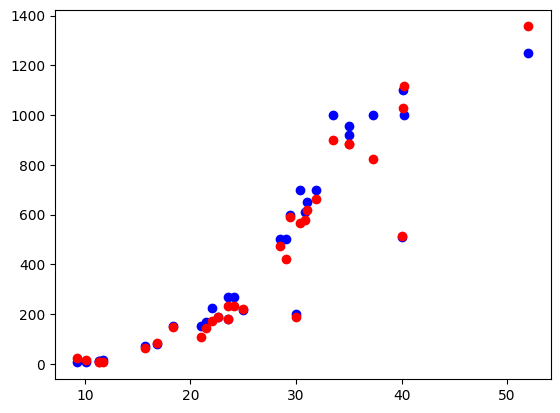

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X_test["Length1"],y_test,color="blue")
plt.scatter(X_test["Length1"],y_pred,color="red")
